In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
dataset_path = "dataset/2016_Building_Energy_Benchmarking.csv"
data = pd.read_csv(dataset_path)

In [59]:
data.shape

(3376, 46)

In [60]:
data[:10]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.00000,0659000030,...,1156514.25000,3946027.00000,12764.52930,1276453.00000,False,NaN,Compliant,NaN,249.98000,2.83000
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.00000,0659000220,...,950425.18750,3242851.00000,51450.81641,5145082.00000,False,NaN,Compliant,NaN,295.86000,2.86000
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.00000,0659000475,...,14515435.00000,49526664.00000,14938.00000,1493800.00000,False,NaN,Compliant,NaN,2089.28000,2.19000
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.00000,0659000640,...,811525.31250,2768924.00000,18112.13086,1811213.00000,False,NaN,Compliant,NaN,286.43000,4.67000
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.00000,0659000970,...,1573448.62500,5368607.00000,88039.98438,8803998.00000,False,NaN,Compliant,NaN,505.01000,2.88000
5,9,2016,Nonresidential COS,Other,West Precinct,810 Virginia St,Seattle,WA,98101.00000,0660000560,...,2160443.75000,7371434.00000,47151.81641,4715182.00000,False,NaN,Compliant,NaN,301.81000,3.10000
6,10,2016,NonResidential,Hotel,Camlin,1619 9th Avenue,Seattle,WA,98101.00000,0660000825,...,823919.87500,2811215.00000,29475.80078,2947580.00000,False,NaN,Compliant,NaN,176.14000,2.12000
7,11,2016,NonResidential,Other,Paramount Theatre,911 Pine St,Seattle,WA,98101.00000,0660000955,...,1065842.75000,3636655.00000,3851.89014,385189.00000,False,NaN,Compliant,NaN,221.51000,2.16000
8,12,2016,NonResidential,Hotel,311wh-Pioneer Square,612 2nd Ave,Seattle,WA,98104.00000,0939000080,...,2138897.75000,7297919.00000,64259.00000,6425900.00000,False,NaN,Compliant,NaN,392.16000,2.39000
9,13,2016,Multifamily MR (5-9),Mid-Rise Multifamily,Lyon Building,607 - 3rd Ave.,Seattle,WA,98104.00000,0939000105,...,742091.18750,2532015.00000,10020.25977,1002026.00000,False,NaN,Compliant,NaN,151.12000,2.37000


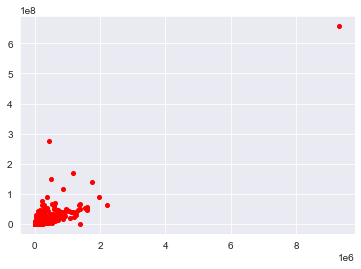

In [61]:
# propertyTotalGFA as a function of Electricity
plt.plot(data["PropertyGFATotal"], data["Electricity(kBtu)"], "ro", markersize=4)
plt.show()

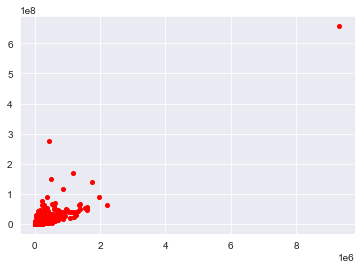

In [62]:
# remove outliers : Elctricity > 1 million

data = data[(data["Electricity(kBtu)"] > 0) & (data["PropertyGFATotal"] > 0) & (data["Electricity(kWh)"] > 0)]

plt.plot(data["PropertyGFATotal"], data["Electricity(kBtu)"], "ro", markersize=4)
plt.show()

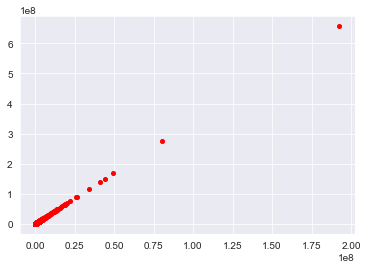

In [63]:
# Easy Linear Regression : x = kWh y = kBtu
plt.plot(data["Electricity(kWh)"], data["Electricity(kBtu)"], "ro", markersize=4)
plt.show()

In [92]:
# Linear Regression "manually" / we transform the dataset into matrices to compute theta
X = np.matrix([np.ones(data.shape[0]), data["Electricity(kWh)"]]).T
Y = np.matrix(data["Electricity(kBtu)"]).T

In [93]:
np.set_printoptions(suppress=True) # remove scientific notation
X[:10]

matrix([[       1.    ,  1156514.25  ],
        [       1.    ,   950425.1875],
        [       1.    , 14515435.    ],
        [       1.    ,   811525.3125],
        [       1.    ,  1573448.625 ],
        [       1.    ,  2160443.75  ],
        [       1.    ,   823919.875 ],
        [       1.    ,  1065842.75  ],
        [       1.    ,  2138897.75  ],
        [       1.    ,   742091.1875]])

In [94]:
# Computing the exact value of the parameter theta
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

# displaying theta with a = slope ; and b = y-intercept
print(theta)

# we test Y = aX + b for X = 10
print(theta.item(0) + theta.item(1) * 10)

[[0.00993694]
 [3.412     ]]
34.1299369180409


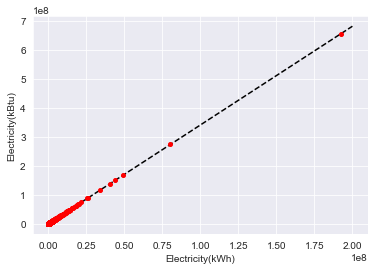

In [97]:
plt.xlabel("Electricity(kWh)")
plt.ylabel("Electricity(kBtu)")

x_min = 0
x_max = 200000000
y_min = theta.item(0)
y_max = theta.item(0) + x_max * theta.item(1)

plt.plot([x_min, x_max], [y_min, y_max], linestyle="--", c="#000000")
plt.plot(data["Electricity(kWh)"], data["Electricity(kBtu)"], "ro", markersize=4)

plt.show()

In [100]:
# Automatic implementation ******* ????

from sklearn import linear_model
regr = linear_model.LinearRegression()

#X = data["Electricity(kWh)"].values
#y = data["Electricity(kBtu)"].values

#from sklearn.model_selection import train_test_split
#xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8)

#regr.fit(X, y)

#regr.predict(??)


import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(X, y)
reg.score(X, y)

reg.coef_

reg.intercept_

reg.predict(np.array([[3, 5]]))

array([16.])